In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error

#pip install catboost xgboost lightgbm
#pip install numpy<2
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### 데이터 불러오기

In [2]:
df=pd.read_csv("data/housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### 데이터 전처리

In [3]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_7724\1590527289.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['total_bedrooms'].fillna(df['total_bedrooms'].median(), inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<Axes: >

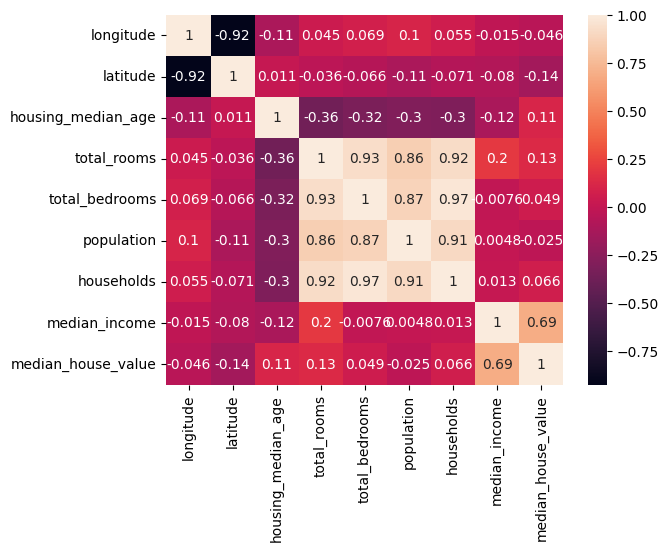

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

#median_income과 median_house_value 관계
#median_income과 total_rooms의 관계


<Axes: xlabel='median_house_value', ylabel='Count'>

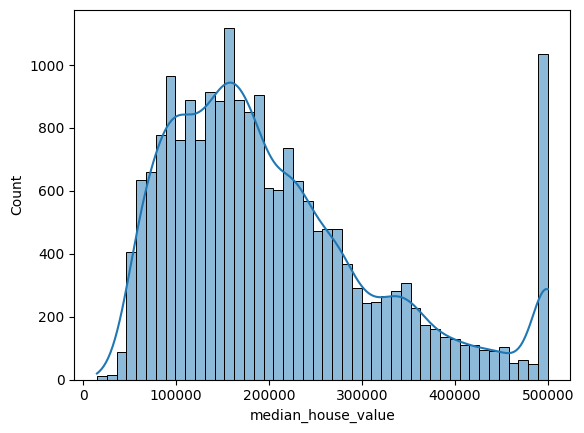

In [9]:
sns.histplot(df['median_house_value'] , kde=True)

In [10]:
# 왜곡도 -0.6 무난 , 0.9 초과일 경우 치우침정도가 크다
df['median_house_value'].skew()

0.9777632739098341

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

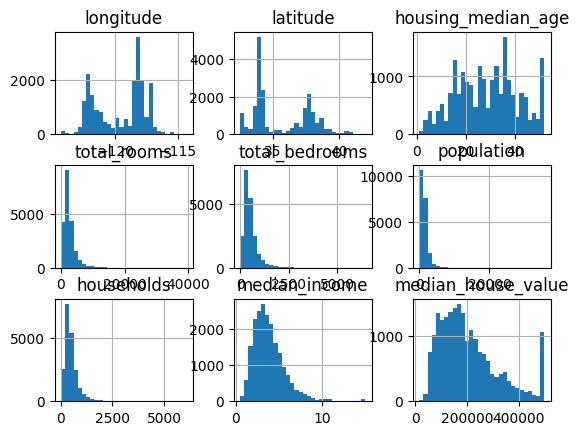

In [11]:
#켈리포니아 데이터는 치우침이 있다. 해결법은 데이터전처리 또는 치우침 줄이는 알고리즘이다.
df.hist(bins=30)


### 방이 너무 많음 =>6400개면...

In [12]:
df['bed_per_room']=df['total_bedrooms']/df['total_rooms'] 



### skew가 너무 높음=>  데이터가 한쪽으로 치우쳐짐

In [13]:
X=df.drop(['median_house_value'], axis=1)
y=np.log(df['median_house_value'])

In [14]:
skew_df=pd.DataFrame(X.select_dtypes(np.number).columns, columns=['Feature'])
skew_df

,Feature
0,longitude
1,latitude
2,housing_median_age
3,total_rooms
4,total_bedrooms
5,population
6,households
7,median_income
8,bed_per_room


In [15]:
from scipy.stats import skew
skew_df['Skew']=skew_df["Feature"].apply(lambda feature : skew(df[feature]))
skew_df

,Feature,Skew
0,longitude,-0.297780
1,latitude,0.465919
2,housing_median_age,0.060326
3,total_rooms,4.147042
4,total_bedrooms,3.480888
5,population,4.935500
6,households,3.410190
7,median_income,1.646537
8,bed_per_room,6.316445


In [16]:
skew_df['ABS_Skew']=skew_df['Skew'].apply(abs)
skew_df['Skewed']= skew_df['ABS_Skew'].apply(lambda x : True if x>0.5 else False)
skew_df

,Feature,Skew,ABS_Skew,Skewed
0,longitude,-0.297780,0.297780,False
1,latitude,0.465919,0.465919,False
2,housing_median_age,0.060326,0.060326,False
3,total_rooms,4.147042,4.147042,True
4,total_bedrooms,3.480888,3.480888,True
5,population,4.935500,4.935500,True
6,households,3.410190,3.410190,True
7,median_income,1.646537,1.646537,True
8,bed_per_room,6.316445,6.316445,True


In [17]:
skew_col=skew_df[skew_df["ABS_Skew"]>0.5]["Feature"].values
skew_col

array(['total_rooms', 'total_bedrooms', 'population', 'households',
       'median_income', 'bed_per_room'], dtype=object)

### 문자열을 숫자로 변경

In [18]:
encoder= LabelEncoder()
X['ocean_proximity']=encoder.fit_transform(X['ocean_proximity'])


In [19]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bed_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,3,0.146591
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,3,0.155797
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,3,0.129516
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,3,0.184458
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,3,0.172096
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,1,0.224625
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,1,0.215208
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,1,0.215173
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,1,0.219892


#### 데이터 분리

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 분류기 모음

r2 score는 0과 1사이의 값을 가지며 1에 가까울수록 선형회귀 모델이 데이터에 대하여 높은 연관성을 가지고 있다고 해석할 수 있다. 

In [21]:
lr=LinearRegression()
lr.fit(X_train, y_train)
predict_lr = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predict_lr))
r2=r2_score(y_test, predict_lr)
print(rmse, r2)

0.3570872229278405 0.6071327977594507


In [22]:
knn=KNeighborsRegressor()
knn.fit(X_train, y_train)
predict_knn = knn.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predict_knn))
r2=r2_score(y_test, predict_knn)
print(rmse, r2)

0.5262616147152989 0.14670236820218208


In [23]:
rf=RandomForestRegressor()
rf.fit(X_train, y_train)
predict_rf = rf.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predict_rf))
r2=r2_score(y_test, predict_rf)
print(rmse, r2)

0.23400401567339582 0.8312888549530244


In [24]:
cat=CatBoostRegressor()
cat.fit(X_train, y_train)
predict_cat = cat.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predict_cat))
r2=r2_score(y_test, predict_cat)
print(rmse, r2)

Learning rate set to 0.063766
0:	learn: 0.5477066	total: 148ms	remaining: 2m 28s
1:	learn: 0.5272182	total: 151ms	remaining: 1m 15s
2:	learn: 0.5082013	total: 153ms	remaining: 50.9s
3:	learn: 0.4912890	total: 155ms	remaining: 38.7s
4:	learn: 0.4750285	total: 158ms	remaining: 31.4s
5:	learn: 0.4605128	total: 161ms	remaining: 26.6s
6:	learn: 0.4475175	total: 163ms	remaining: 23.1s
7:	learn: 0.4353580	total: 165ms	remaining: 20.4s
8:	learn: 0.4240331	total: 167ms	remaining: 18.4s
9:	learn: 0.4146684	total: 169ms	remaining: 16.7s
10:	learn: 0.4052256	total: 170ms	remaining: 15.3s
11:	learn: 0.3969183	total: 172ms	remaining: 14.2s
12:	learn: 0.3896859	total: 175ms	remaining: 13.3s
13:	learn: 0.3833644	total: 177ms	remaining: 12.5s
14:	learn: 0.3761449	total: 179ms	remaining: 11.8s
15:	learn: 0.3707153	total: 181ms	remaining: 11.1s
16:	learn: 0.3645221	total: 183ms	remaining: 10.6s
17:	learn: 0.3598349	total: 185ms	remaining: 10.1s
18:	learn: 0.3544757	total: 187ms	remaining: 9.66s
19:	learn

In [25]:
xg=XGBRegressor()
xg.fit(X_train, y_train)
predict_xg = xg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predict_xg))
r2=r2_score(y_test, predict_xg)
print(rmse, r2)

0.23215147603571726 0.833949552238219


In [26]:
lgbm=LGBMRegressor()
lgbm.fit(X_train, y_train)
predict_lgbm = lgbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predict_lgbm))
r2=r2_score(y_test, predict_lgbm)
print(rmse, r2)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2098
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 10
[LightGBM] [Info] Start training from score 12.086494
0.23207577074735802 0.8340578336718856


rmse 감소하면 r2가 증가한다 <br />
성능이 좋아지는 것일까 VS 과대적합일까

In [27]:
f_predict=(
    0.25*predict_cat+
    0.25*predict_rf+
    0.25*predict_lgbm+
    0.25*predict_xg
)

In [28]:
rmse = np.sqrt(mean_squared_error(y_test, f_predict))
r2=r2_score(y_test, f_predict)
print(rmse, r2)

0.22043413102263285 0.8502886137887318
